# The Spark Foundation - GRIP-Data Science and Bussiness Analytics-JULY'2021

# TASK 1 : Prediction Using Supervised ML

### Author: PALAK PANDEY

### Dataset used: Student Scores
       . It can be downloaded through the link-http://bit.ly/w-data 

### Problem Statement:

     Predict the percentage score of a student based on the number of hours studied.

## Import necessary libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

## Read the csv dataset as a pandas dataframe

In [6]:
url="http://bit.ly/w-data"
Data = pd.read_csv(url)

In [7]:
print(Data.shape)  #view the shape i.e. number of rows, column

(25, 2)


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Visualize the data

In [10]:
Data.corr(method='pearson')  #looking for correlations

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [11]:
Data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [12]:
x=Data['Hours']
y=Data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

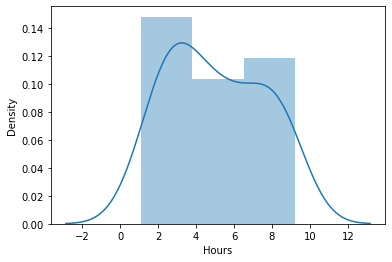

In [13]:
sns.distplot(x)

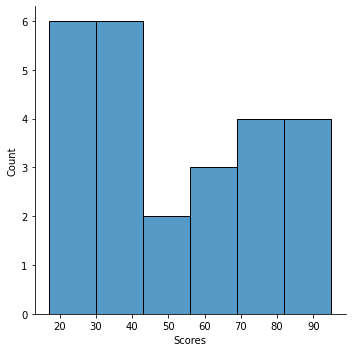

In [14]:
sns.displot(y)

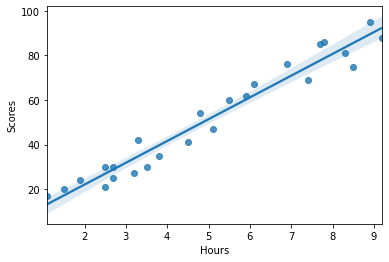

In [15]:
sns.regplot(x, y); # regression plot gives a better and clear visualization for such data

## Seperate feature(s) and target

In [16]:
X = Data[['Hours']]
Y = Data['Scores']

## Train-Test Split

In [17]:
from sklearn.model_selection  import train_test_split

train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state = 0)

### Model Building

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
#model = DecisionTreeRegressor()
#model = RandomForestRegressor()
model.fit(train_X, train_Y)   #TRAIN THE MODEL

LinearRegression()

In [22]:
pred_y = model.predict(val_X)  #prediction

In [24]:
pd.DataFrame({'Actual': val_Y, 'Prediction': pred_y}) #view actaul and predictedon test set side by side

,Actual,Prediction
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


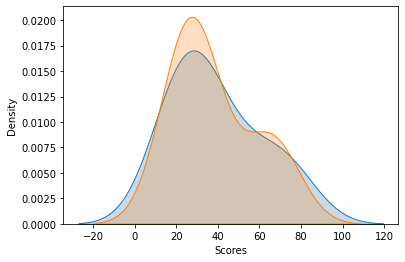

In [25]:
# Actual vs Predicted distribution plot

sns.kdeplot(pred_y, label="Prediction", shade=True);
sns.kdeplot(val_Y, label="Actual", shade=True);

In [26]:
print('Train accuracy:', model.score(train_X, train_Y),'\nTest Accuracy:',model.score(val_X,val_Y))

Train accuracy: 0.9484509249326872 
Test Accuracy: 0.9367661043365055


In [30]:
# Preict percentage for custom input values for hours
# Q. What will be predicted score if a student studies for 9.25 hrs/day?


h = [[9.25]]
s = model.predict(h)
print('A student who studies', h[0][0], 'hours is estimated to score', s[0])

A student who studies 9.25 hours is estimated to score 93.89272889341655
